In [1]:
# part of codes below are from: https://www.geeksforgeeks.org/linear-regression-using-tensorflow/
# I use tf 2.1; any version > 2.1 should be compatible

# import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

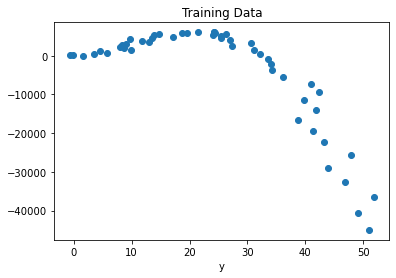

In [21]:
# set random seeds: just for the purpose of experimenting
np.random.seed(123) 
tf.random.set_seed(123)

# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 

# nonlinearity
y = 100*x + 30*x*x - x*x*x
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [24]:
# reshape x 
X = x.reshape((50,1))
print(x)
print(X)

[ 1.57175348 -0.69047716 -0.14437204  3.47174264  5.83738441  4.4868925
  9.96856257  8.62149505  8.01072052  8.32061361  8.94950576 13.05688745
 11.75347592  9.7427293  13.47006833 17.21008569 13.78646446 14.75055282
 18.61975793 19.6423758  21.48337093 24.22402578 24.24462219 24.35757584
 26.26934298 24.09387539 25.42492149 25.37712626 26.92114094 30.63964573
 27.34908442 31.10226244 32.09996333 33.62295017 34.10051987 34.2123755
 36.14550433 40.90221535 42.32879035 39.81061177 41.80795014 38.76168185
 41.39542671 43.19616072 47.82843245 43.92201027 46.80304962 51.84366196
 49.13547279 50.90315621]
[[ 1.57175348]
 [-0.69047716]
 [-0.14437204]
 [ 3.47174264]
 [ 5.83738441]
 [ 4.4868925 ]
 [ 9.96856257]
 [ 8.62149505]
 [ 8.01072052]
 [ 8.32061361]
 [ 8.94950576]
 [13.05688745]
 [11.75347592]
 [ 9.7427293 ]
 [13.47006833]
 [17.21008569]
 [13.78646446]
 [14.75055282]
 [18.61975793]
 [19.6423758 ]
 [21.48337093]
 [24.22402578]
 [24.24462219]
 [24.35757584]
 [26.26934298]
 [24.09387539]
 [

In [27]:
# try a single y = ax + b models first
# first need to add 1 to X as the coefficient
X_prime = np.insert(X, 0, 1, axis=1)
print(X_prime)

[[ 1.          1.57175348]
 [ 1.         -0.69047716]
 [ 1.         -0.14437204]
 [ 1.          3.47174264]
 [ 1.          5.83738441]
 [ 1.          4.4868925 ]
 [ 1.          9.96856257]
 [ 1.          8.62149505]
 [ 1.          8.01072052]
 [ 1.          8.32061361]
 [ 1.          8.94950576]
 [ 1.         13.05688745]
 [ 1.         11.75347592]
 [ 1.          9.7427293 ]
 [ 1.         13.47006833]
 [ 1.         17.21008569]
 [ 1.         13.78646446]
 [ 1.         14.75055282]
 [ 1.         18.61975793]
 [ 1.         19.6423758 ]
 [ 1.         21.48337093]
 [ 1.         24.22402578]
 [ 1.         24.24462219]
 [ 1.         24.35757584]
 [ 1.         26.26934298]
 [ 1.         24.09387539]
 [ 1.         25.42492149]
 [ 1.         25.37712626]
 [ 1.         26.92114094]
 [ 1.         30.63964573]
 [ 1.         27.34908442]
 [ 1.         31.10226244]
 [ 1.         32.09996333]
 [ 1.         33.62295017]
 [ 1.         34.10051987]
 [ 1.         34.2123755 ]
 [ 1.         36.14550433]
 

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[2]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

model.build(input_shape=(None,2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [31]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [32]:
history = model.fit(X_prime, y,epochs=100)

Train on 50 samples
Epoch 1/100
50/50 [==============================] - 0s 8ms/sample - loss: 195261193.6000 - mae: 8733.2920 - mse: 195261200.0000
Epoch 2/100
50/50 [==============================] - 0s 60us/sample - loss: 195187599.3600 - mae: 8732.6348 - mse: 195187584.0000
Epoch 3/100
50/50 [==============================] - 0s 80us/sample - loss: 195137943.0400 - mae: 8732.3721 - mse: 195137952.0000
Epoch 4/100
50/50 [==============================] - 0s 80us/sample - loss: 195096994.5600 - mae: 8732.0322 - mse: 195096992.0000
Epoch 5/100
50/50 [==============================] - 0s 80us/sample - loss: 195055530.2400 - mae: 8731.6953 - mse: 195055536.0000
Epoch 6/100
50/50 [==============================] - 0s 80us/sample - loss: 195017248.6400 - mae: 8731.3887 - mse: 195017232.0000
Epoch 7/100
50/50 [==============================] - 0s 100us/sample - loss: 194980244.4800 - mae: 8731.2041 - mse: 194980256.0000
Epoch 8/100
50/50 [==============================] - 0s 82us/sample - 

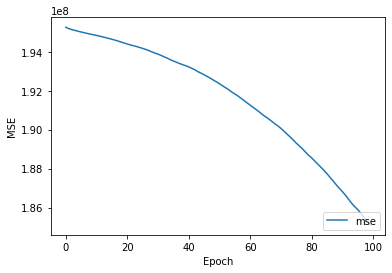

In [34]:
plt.plot(history.history['mse'], label='mse')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='lower right')

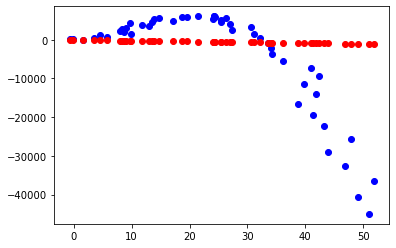

In [36]:
prediction = model.predict(X_prime).flatten()

plt.scatter(x, y, color='blue')
plt.scatter(x,prediction,color='red')

In [37]:
# Emmmm......at least we have some outputs; now we try to fix it

In [46]:
x_2 = (x**2).reshape((50,1))
x_3 = (x**3).reshape((50,1))
print(X_prime.shape)
print(x_2.shape)
print(x_2.shape)
X_super = np.concatenate((X_prime, x_2), axis = 1)
print(X_super.shape)
X_ultimate = np.concatenate((X_super, x_3), axis = 1)
print(X_ultimate)

(50, 2)
(50, 1)
(50, 1)
(50, 3)
[[ 1.00000000e+00  1.57175348e+00  2.47040902e+00  3.88287398e+00]
 [ 1.00000000e+00 -6.90477157e-01  4.76758705e-01 -3.29190995e-01]
 [ 1.00000000e+00 -1.44372045e-01  2.08432874e-02 -3.00918802e-03]
 [ 1.00000000e+00  3.47174264e+00  1.20529970e+01  4.18449036e+01]
 [ 1.00000000e+00  5.83738441e+00  3.40750568e+01  1.98909205e+02]
 [ 1.00000000e+00  4.48689250e+00  2.01322043e+01  9.03310363e+01]
 [ 1.00000000e+00  9.96856257e+00  9.93722396e+01  9.90598388e+02]
 [ 1.00000000e+00  8.62149505e+00  7.43301769e+01  6.40837253e+02]
 [ 1.00000000e+00  8.01072052e+00  6.41716432e+01  5.14061099e+02]
 [ 1.00000000e+00  8.32061361e+00  6.92326109e+01  5.76057805e+02]
 [ 1.00000000e+00  8.94950576e+00  8.00936534e+01  7.16798612e+02]
 [ 1.00000000e+00  1.30568875e+01  1.70482310e+02  2.22596833e+03]
 [ 1.00000000e+00  1.17534759e+01  1.38144196e+02  1.62367448e+03]
 [ 1.00000000e+00  9.74272930e+00  9.49207741e+01  9.24787407e+02]
 [ 1.00000000e+00  1.34700683e

In [59]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

model2.build(input_shape=(None,4))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [60]:
optimizer2 = tf.keras.optimizers.RMSprop(0.001)

model2.compile(loss='mse',optimizer=optimizer2,metrics=['mae', 'mse'])

history2 = model2.fit(X_ultimate, y,epochs=1000)

Train on 50 samples
Epoch 1/1000
50/50 [==============================] - 0s 8ms/sample - loss: 181384254.0800 - mae: 8554.9912 - mse: 181384256.0000
Epoch 2/1000
50/50 [==============================] - 0s 60us/sample - loss: 85494073.6000 - mae: 6587.2090 - mse: 85494072.0000
Epoch 3/1000
50/50 [==============================] - 0s 80us/sample - loss: 55958201.6000 - mae: 6034.7075 - mse: 55958200.0000
Epoch 4/1000
50/50 [==============================] - 0s 60us/sample - loss: 49588732.1600 - mae: 5907.4131 - mse: 49588732.0000
Epoch 5/1000
50/50 [==============================] - 0s 60us/sample - loss: 46161165.2800 - mae: 5819.2061 - mse: 46161164.0000
Epoch 6/1000
50/50 [==============================] - 0s 60us/sample - loss: 45934138.0800 - mae: 5812.2090 - mse: 45934136.0000
Epoch 7/1000
50/50 [==============================] - 0s 100us/sample - loss: 49033160.0000 - mae: 5993.9917 - mse: 49033160.0000
Epoch 8/1000
50/50 [==============================] - 0s 60us/sample - loss

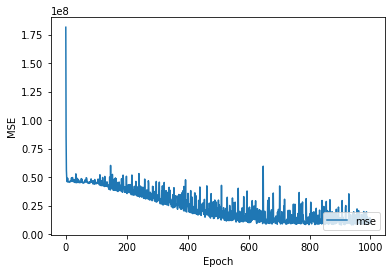

In [61]:
plt.plot(history2.history['mse'], label='mse')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='lower right')

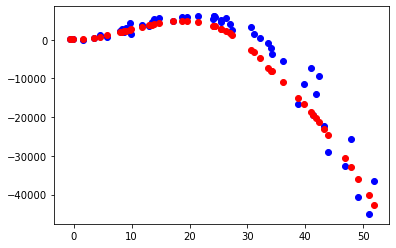

In [62]:
prediction2 = model2.predict(X_ultimate).flatten()

plt.scatter(x, y, color='blue')
plt.scatter(x,prediction2,color='red')

In [ ]:
# it is very close; note we added noise to the data, so the weights won't be exactly: y = 100*x + 30*x*x - x*x*x